***TUBES MECHINE LEARNING - 1301194434_MASAYU ANANDITA PRAMESWARI_IF4310***

##Importing Libraries

In [285]:
#Library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from math import ceil
import random as rd
import copy

## Assigning Dataset

In [286]:
#Import dataset
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
#Read dataset
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kendaraan_train.csv')
df_train 

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Preprocessing

In [289]:
#Mencari info dari setiap kolom
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [290]:
#drop kolom id karena tidak dibutuhkan
df = df_train.drop('id',axis=1)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


### Check Null/NaN Values

In [291]:
#Menghitung data null/kosong pada dataset
missing_value_data = df.isnull()
for column in missing_value_data.columns.values.tolist(): 
  print(column)
  print(missing_value_data[column].value_counts())
  print("") #True untuk tipe data NaN

Jenis_Kelamin
False    271391
True      14440
Name: Jenis_Kelamin, dtype: int64

Umur
False    271617
True      14214
Name: Umur, dtype: int64

SIM
False    271427
True      14404
Name: SIM, dtype: int64

Kode_Daerah
False    271525
True      14306
Name: Kode_Daerah, dtype: int64

Sudah_Asuransi
False    271602
True      14229
Name: Sudah_Asuransi, dtype: int64

Umur_Kendaraan
False    271556
True      14275
Name: Umur_Kendaraan, dtype: int64

Kendaraan_Rusak
False    271643
True      14188
Name: Kendaraan_Rusak, dtype: int64

Premi
False    271262
True      14569
Name: Premi, dtype: int64

Kanal_Penjualan
False    271532
True      14299
Name: Kanal_Penjualan, dtype: int64

Lama_Berlangganan
False    271839
True      13992
Name: Lama_Berlangganan, dtype: int64

Tertarik
False    285831
Name: Tertarik, dtype: int64



### Handling Missing values

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [293]:
#Mengisi missing values untuk data numerical diskrit menggunakan modus
#JenisKelamin
mod_Jenis_Kelamin = df['Jenis_Kelamin'].mode()[0]
df['Jenis_Kelamin'].replace(np.nan, mod_Jenis_Kelamin, inplace=True)
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].astype('object')

#SIM
mod_sim = df['SIM'].astype('float').mode()[0]
df['SIM'].replace(np.nan, mod_sim, inplace=True)

#Kode_Daerah
mod_kodeDaerah = df['Kode_Daerah'].astype('float').mode()[0]
df['Kode_Daerah'].replace(np.nan, mod_kodeDaerah, inplace=True)

#Sudah_Asuransi
mod_asuransi = df['Sudah_Asuransi'].astype('float').mode()[0]
df['Sudah_Asuransi'].replace(np.nan, mod_asuransi, inplace=True)

#Umur_Kendaraan
mod_umurKendaraan = df['Umur_Kendaraan'].mode()[0]
df['Umur_Kendaraan'].replace(np.nan, mod_umurKendaraan, inplace=True)
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].astype('object')

#Kendaraan_Rusak
mod_Kendaraan_Rusak = df['Kendaraan_Rusak'].mode()[0]
df['Kendaraan_Rusak'].replace(np.nan, mod_Kendaraan_Rusak, inplace=True)
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].astype('object')

#Kanal_Penjualan
mod_Kanal_Penjualan	= df['Kanal_Penjualan'].astype('float').mode()[0]
df['Kanal_Penjualan'].replace(np.nan, mod_Kanal_Penjualan, inplace=True)

#Mengisi missing values untuk data numerical kontinyu menggunakan mean
#Umur
mean_umur = df['Umur'].astype('float').mean(axis=0)
df['Umur'].replace(np.nan, mean_umur, inplace=True)

#Premi
mean_Premi = df['Premi'].astype('float').mean(axis=0)
df['Premi'].replace(np.nan, mean_Premi, inplace=True)

#Lama_Berlangganan
mean_Lama_Berlangganan = df['Lama_Berlangganan'].astype('float').mean(axis=0)
df['Lama_Berlangganan'].replace(np.nan, mean_Lama_Berlangganan, inplace=True)


In [294]:
#Cek apakah masih ada Data null
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


###Check Outlier

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  object 
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  object 
 6   Kendaraan_Rusak    285831 non-null  object 
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


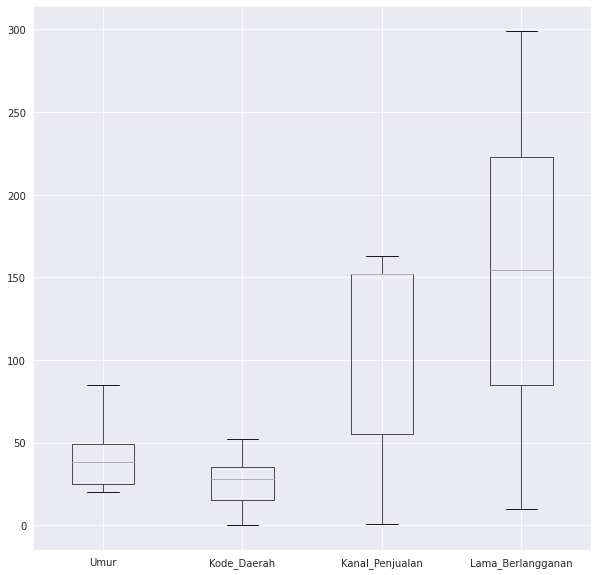

In [296]:
#check pencilan kolom umur,kode daerah,kanal penjualan, dan lama berlangganan
boxplot = df.boxplot(column = ['Umur','Kode_Daerah','Kanal_Penjualan','Lama_Berlangganan'])


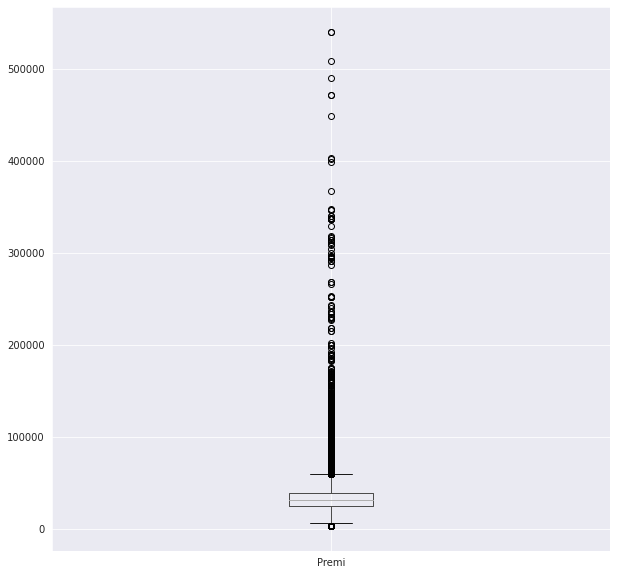

In [297]:
#Check pencilan kolom premi
boxplot = df.boxplot(column = ['Premi'])

Dikarenakan kolom premi memiliki banyak pencilan maka harus ditangani

### Handling Outlier

In [298]:
#Mengatasi outlier dengan interquartile
def interquartile(df,x):
  q1 = (df[x]).quantile(0.25)
  q3 = (df[x]).quantile(0.75) 
  iqr = q3 - q1 #range q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

In [299]:
#Test
maximum,minimum = interquartile(df,'Premi')
print('max: ',maximum,' | min:',minimum)

max:  59719.0  | min: 4055.0


In [300]:
#Replacing outliers
def replace_outliers(df,x,maximum,minimum):
  more_than = (df[x] > maximum)
  less_than = (df[x] < minimum)
  print('more_than: ',more_than,' | less_than: ',less_than)
  df[x] = df[x].mask(more_than, maximum,axis=0)
  df[x] = df[x].mask(less_than, minimum,axis=0)
  return df

more_than:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool  | less_than:  0         False
1         False
2         False
3          True
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool


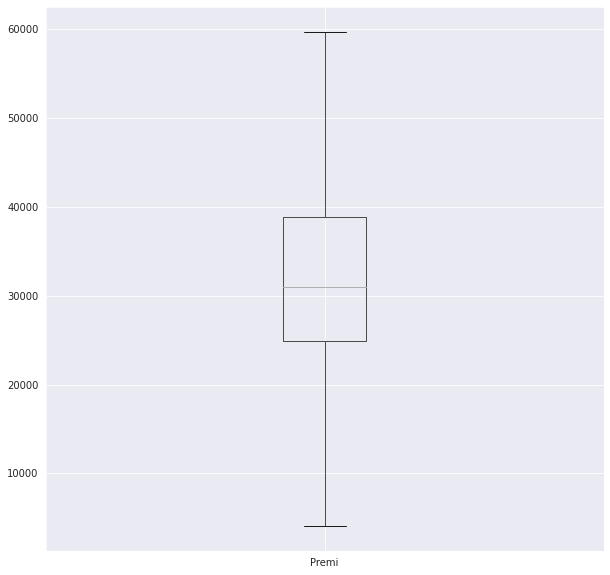

In [301]:
#Menampilkan boxplot premi yg sudah tidak memiliki outlier
maximum,minimum = interquartile(df,'Premi')
df = replace_outliers(df,'Premi',maximum,minimum)
boxplot = df.boxplot(column=['Premi'])

### Check Corelations

In [302]:
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,4055.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [303]:
#hanya menampilkan korelasi data yang bukan object 
df_corr = df[['Umur','Kode_Daerah','Premi','Kanal_Penjualan','Lama_Berlangganan']].corr()

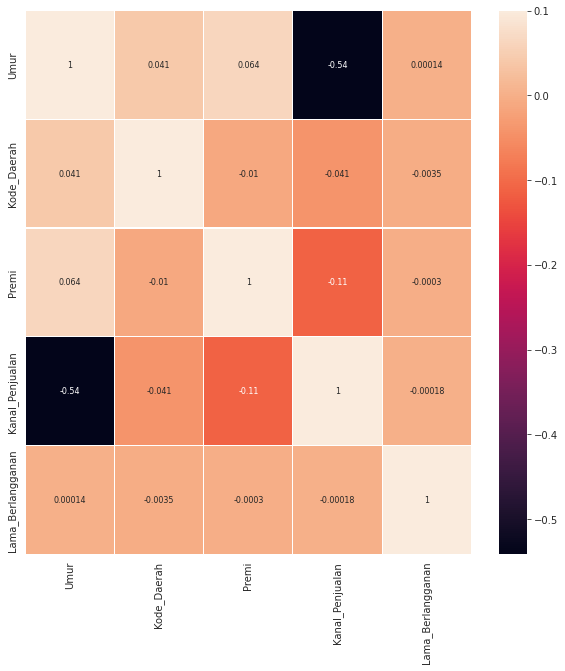

In [304]:
#Check korelasi dari setiap kolom
sns.set({'figure.figsize':(10,10)})
sns.heatmap(df_corr, linewidths=.05, vmax=0.1, annot=True, annot_kws={"fontsize":8})

Didapatkan nilai corelasi paling tinggi yang mendekati -1 adalah antara umur dengan kanal penjualan yaitu -0.54




### Data SPLITTING
Collumns values yang paling berpengaruh dengan label:


[Umur,kanal_penjualan], korelasi = -0.54

In [305]:
#Data yang memiliki korelasi yg tinggi
#kolom dengan korelasi tinggi di inisialisasi kan dengan variabel x dan y dan hanya memakai dataframe dengan 2 kolom tsb
x = 'Umur'
y = 'Kanal_Penjualan'
df = df.loc[:,[x,y]]

df

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
2,21.0,160.0
3,58.0,124.0
4,50.0,88.0
...,...,...
285826,23.0,152.0
285827,21.0,152.0
285828,23.0,152.0
285829,68.0,124.0


###Normalize

In [306]:
#Normalisasi / Scaling
# menyamakan range/skala dari kolom Umur dan kanal penjualan antara range 0-1
df['Umur'] = df['Umur']/df['Umur'].max()
df['Kanal_Penjualan'] = df['Kanal_Penjualan']/df['Kanal_Penjualan'].max()
df

,Umur,Kanal_Penjualan
0,0.352941,0.932515
1,0.564706,0.177914
2,0.247059,0.981595
3,0.682353,0.760736
4,0.588235,0.539877
...,...,...
285826,0.270588,0.932515
285827,0.247059,0.932515
285828,0.270588,0.932515
285829,0.800000,0.760736


### Visualisasi Pattern persebaran Data [x,y]

Text(0, 0.5, 'Kanal_Penjualan')

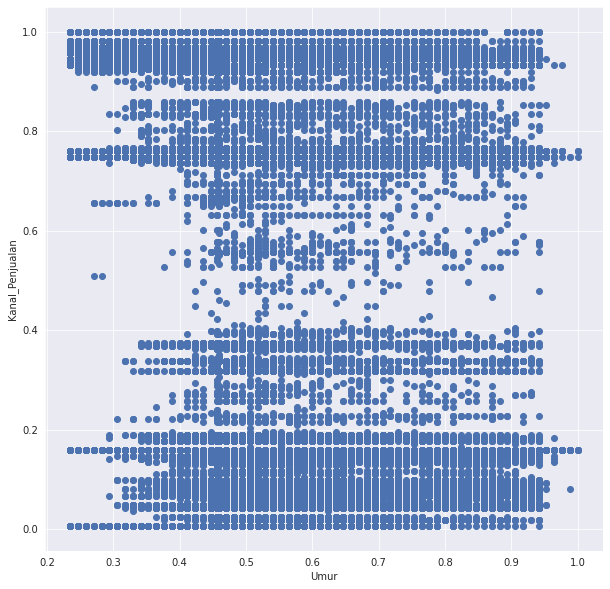

In [307]:
#Display data yang sudah normalisasi dengan menggunakan fungsi scatter
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)

## Cluster Kmeans Function

### Centroid Initiation
Menentukan titik centroid dari sebaran data diatas dengan mengambil angka random untuk dijadikan titik centroid

In [308]:
def Initiate_Centroid(df,x,y,k):
  random.seed(10)
  centroids = {i + 1 : [random.choices(df[x]),random.choices(df[y])] for i in range(k)}
  return centroids

[[0.45699218774533085], [0.7607361963190185]]
[[0.6823529411764706], [0.9325153374233128]]


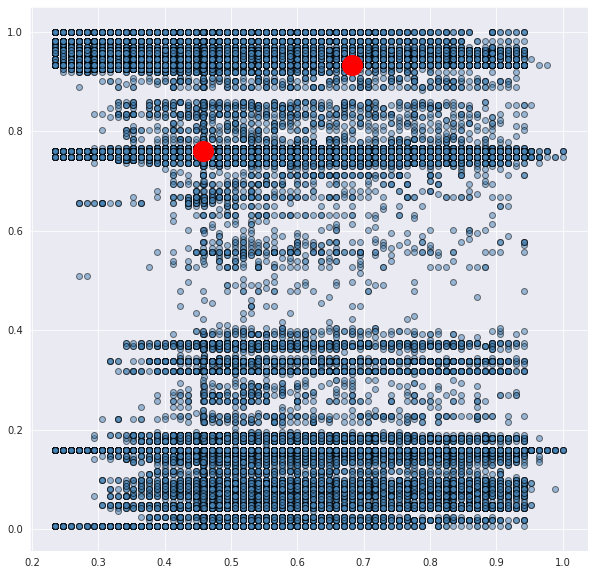

In [309]:
#Menentukan 2 klaster data dari gambaran sebaran data diatas (x dan y)
k=2
cen = Initiate_Centroid(df,x,y,k)
for i in cen :
    print(cen[i])

plt.scatter(df[x], df[y], color='steelblue', alpha=0.5, edgecolor='black')
for i in cen:
  plt.scatter(cen[i][0],cen[i][1],color='red', s=400)
plt.show()

### Calculate Distance √((x1-x2)² + (y1-y2)²
jarak centroid dengan setiap atribut

In [310]:
#Untuk menentukan jarak dari sebaran data kemudian dikelompokan ke dalam titik centroid terdekat
def Calc_Dist(df,x,y,centroid):
  for i in centroid.keys():
    #menambahkan kolom i(1,2,..,n) yaitu jarak antara objek x dan y dengan masing masing centroid
    df[str(i)] = np.sqrt((df[x] - centroid[i][0]) ** 2 + (df[y] - centroid[i][1]) ** 2) 
  return df #jarak antara (premi, kanal_penjualan)[i] dg centroid

In [311]:

df2 = Calc_Dist(df,x,y,cen)
df2

,Umur,Kanal_Penjualan,1,2
0,0.352941,0.932515,0.200835,0.329412
1,0.564706,0.177914,0.592692,0.763717
2,0.247059,0.981595,0.304714,0.438052
3,0.682353,0.760736,0.225361,0.171779
4,0.588235,0.539877,0.256911,0.403761
...,...,...,...,...
285826,0.270588,0.932515,0.253485,0.411765
285827,0.247059,0.932515,0.271257,0.435294
285828,0.270588,0.932515,0.253485,0.411765
285829,0.800000,0.760736,0.343008,0.208204


### Menentukan Keanggotaan

In [312]:
array_color = ['gray','red','purple','blue','pink','brown','green','orange','olive','cyan','black']

In [313]:
#membagi wilayah berdasarkan index cluster dengan warna tertentu sesuai dengan array color yg sudah ditentukan
def df_membership(df,centroid):
  df['index cluster'] = (df.loc[:, ['{}'.format(i) for i in centroid.keys()]].idxmin(axis=1)).astype('int') 
  df['color'] = df['index cluster'].map(lambda x: array_color[x])
  return df

In [314]:
df2 = df_membership(df2,cen)
df2

,Umur,Kanal_Penjualan,1,2,index cluster,color
0,0.352941,0.932515,0.200835,0.329412,1,red
1,0.564706,0.177914,0.592692,0.763717,1,red
2,0.247059,0.981595,0.304714,0.438052,1,red
3,0.682353,0.760736,0.225361,0.171779,2,purple
4,0.588235,0.539877,0.256911,0.403761,1,red
...,...,...,...,...,...,...
285826,0.270588,0.932515,0.253485,0.411765,1,red
285827,0.247059,0.932515,0.271257,0.435294,1,red
285828,0.270588,0.932515,0.253485,0.411765,1,red
285829,0.800000,0.760736,0.343008,0.208204,2,purple


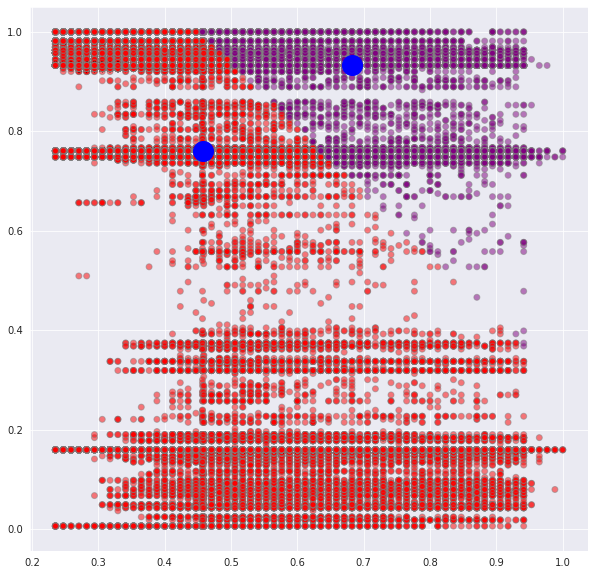

In [315]:
plt.scatter(df2[x], df2[y], color=df2['color'], alpha=0.5, edgecolor='gray')
for i in cen:
  plt.scatter(cen[i][0],cen[i][1],color='blue', s=400)
plt.show()

### Menentukan Centroid baru

In [316]:
#Membuat titik centroid baru dengan mengambil nilai rata-rata index cluster
def rearrange_centroid(df,centroid):
  for i in centroid.keys():
    centroid[i][0] = np.mean(df[df['index cluster'] == i][x])
    centroid[i][1] = np.mean(df[df['index cluster'] == i][y])
  return centroid

### Main Func Klusterisasi

In [317]:
#Menjalankan fungsi yang telah dibuat secara prosedural
def clusterisasi(df,x,y,k):
  centroid = Initiate_Centroid(df,x,y,k)
  df2 = copy.deepcopy(df)
  df2 = Calc_Dist(df2,x,y,centroid)
  df2 = df_membership(df2,centroid)
  centroid = rearrange_centroid(df2,centroid)
  while (True):
    oldcentroid = copy.deepcopy(centroid)
    df2 = Calc_Dist(df2,x,y,centroid)
    df2 = df_membership(df2,centroid)
    centroid = rearrange_centroid(df2,centroid)
    if (oldcentroid == centroid):
      break
  return (df2,centroid)

### Test Clusterisasi K=2

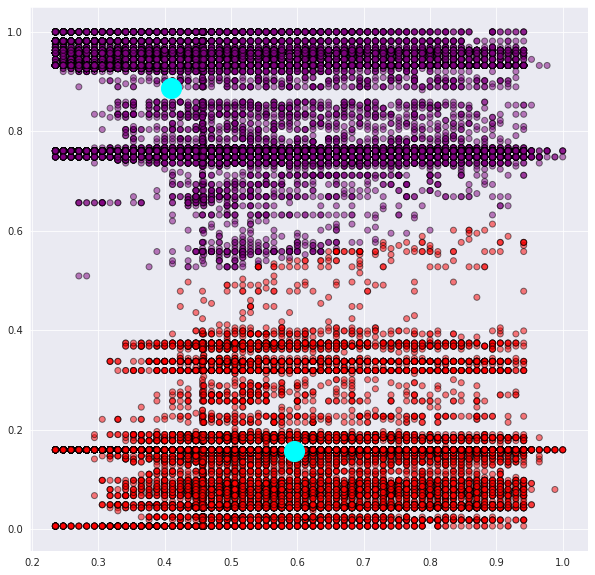

In [318]:
k=2

df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['color'], alpha=0.5, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='cyan', s=400)
plt.show()

## Observasi K-most optimum using Elbow Method
Mementukan nilai K yang paling optimum menggunakan elbow method

### Determine Sum Squared Error (SSE) 
Hitung SSE(jumlah jarak kuadrat dari setiap titik ke pusat yang ditetapkan)
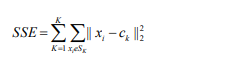


In [319]:
def sse(df,centroid):
  sum = 0
  for i in range(len(centroid)):
    j = i+1
    k = df[(df['index cluster'] == j)]['{}'.format(j)]**2
    sum += k.sum()
  return sum

### Determine WCSS (Within-Cluster-Sum-of-Squares)
WCSS adalah jumlah kuadrat jarak setiap titik data di semua cluster ke masing-masing centroid.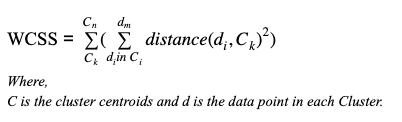

In [320]:
#Menampilkan nilai distorsi dari setiap k
wcss = []
for i in range(10): 
  df2, centroid = clusterisasi(df,x,y,i+1)
  wcss.append(sse(df2, centroid))
  print('K=',i+1,'| Distortion: ',wcss[i])

K= 1 | Distortion:  39900.23838943261
K= 2 | Distortion:  8944.019842512766
K= 3 | Distortion:  4344.413699824377
K= 4 | Distortion:  3368.9195140559286
K= 5 | Distortion:  2807.978430709354
K= 6 | Distortion:  2606.430710066956
K= 7 | Distortion:  1499.7764410621608
K= 8 | Distortion:  1403.761439278466
K= 9 | Distortion:  1288.400980211387
K= 10 | Distortion:  1260.5865541888504


#**Fungsi elbow method** 
Adalah untuk menentukan jumlah cluster yang paling ideal dengan membandingkan Number of cluster dengan WCSS. 

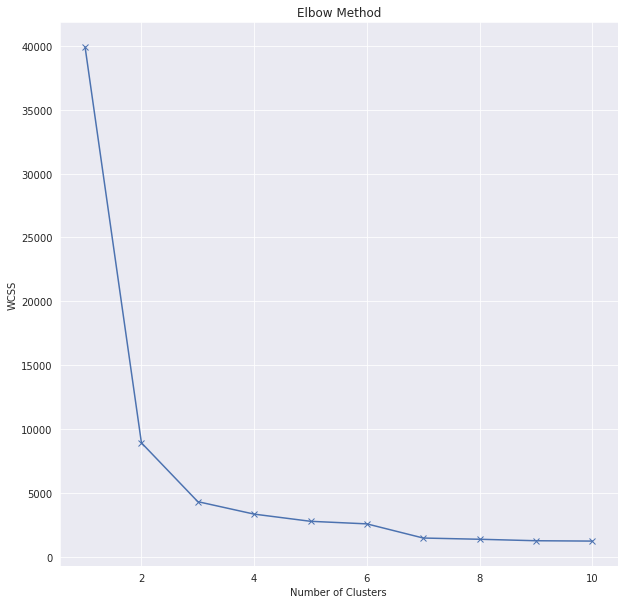

In [321]:
plt.plot(range(1, 11), wcss, '-bx')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Di dapatkan nilai paling optimum adalah 3 & 4 

## Output Kmeans = 3

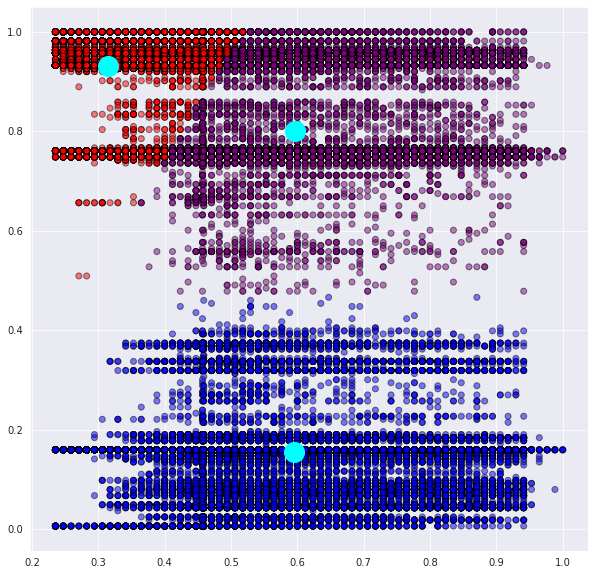

In [322]:
k = 3

df2, centroid = clusterisasi(df,x,y,k)
plt.scatter(df2[x], df2[y], color=df2['color'], alpha=0.5, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='cyan', s=400)
plt.show()

## Output Kmeans = 4

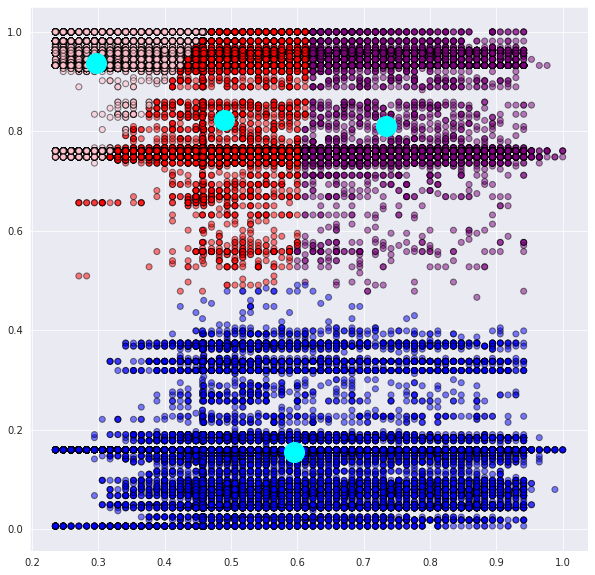

In [323]:
k = 4

df2, centroid = clusterisasi(df,x,y,k)
plt.scatter(df2[x], df2[y], color=df2['color'], alpha=0.5, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='cyan', s=400)
plt.show()